<a href="https://colab.research.google.com/github/rachidboukhoudmi/face_Mask_Detection/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:02<00:00, 57.1MB/s]
100% 163M/163M [00:02<00:00, 62.8MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  sample_data  with_mask_1.jpg  without_mask_1004.jpg


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_142.jpg', 'with_mask_1998.jpg', 'with_mask_246.jpg', 'with_mask_1455.jpg', 'with_mask_2830.jpg']
['with_mask_568.jpg', 'with_mask_1456.jpg', 'with_mask_2131.jpg', 'with_mask_2843.jpg', 'with_mask_2970.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1813.jpg', 'without_mask_398.jpg', 'without_mask_1344.jpg', 'without_mask_2481.jpg', 'without_mask_3529.jpg']
['without_mask_1266.jpg', 'without_mask_3714.jpg', 'without_mask_3382.jpg', 'without_mask_2201.jpg', 'without_mask_2198.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

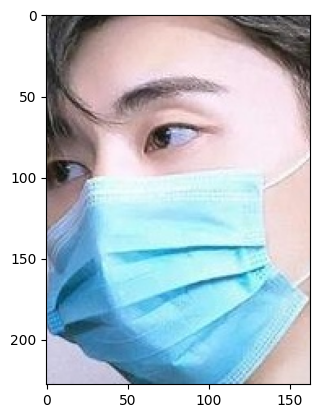

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

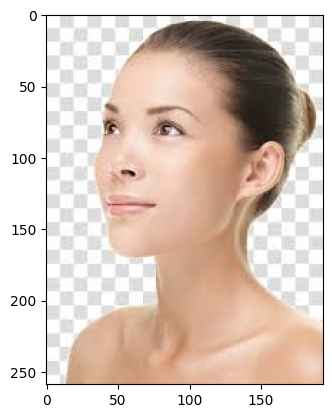

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[ 62,  57,  51],
        [ 72,  67,  61],
        [ 51,  48,  43],
        ...,
        [154, 137, 123],
        [196, 178, 163],
        [218, 199, 183]],

       [[ 59,  55,  50],
        [ 65,  62,  56],
        [ 45,  42,  37],
        ...,
        [105,  91,  81],
        [173, 154, 136],
        [221, 199, 182]],

       [[ 58,  54,  50],
        [ 63,  59,  55],
        [ 43,  40,  35],
        ...,
        [ 72,  62,  56],
        [115, 101,  88],
        [187, 167, 148]],

       ...,

       [[252, 235, 225],
        [252, 236, 227],
        [253, 239, 230],
        ...,
        [254, 205, 209],
        [254, 208, 211],
        [252, 209, 213]],

       [[249, 232, 222],
        [250, 233, 223],
        [250, 232, 222],
        ...,
        [253, 205, 209],
        [252, 207, 211],
        [250, 209, 214]],

       [[249, 231, 220],
        [248, 230, 219],
        [247, 229, 219],
        ...,
        [251, 205, 209],
        [250, 206, 212],
        [248, 208, 215]]], dtype=uint8)
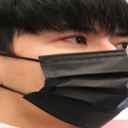

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 76,  74,  76],
        [ 82,  80,  84],
        [ 75,  74,  79],
        ...,
        [ 45,  41,  45],
        [ 40,  40,  45],
        [ 40,  44,  46]],

       [[ 77,  75,  78],
        [ 83,  82,  85],
        [ 78,  78,  80],
        ...,
        [ 48,  45,  49],
        [ 43,  41,  46],
        [ 43,  43,  46]],

       [[ 76,  75,  78],
        [ 84,  84,  86],
        [ 73,  74,  75],
        ...,
        [ 48,  46,  50],
        [ 46,  45,  50],
        [ 46,  46,  49]],

       ...,

       [[187, 181, 183],
        [182, 176, 178],
        [172, 166, 169],
        ...,
        [ 29,  29,  31],
        [ 31,  32,  34],
        [ 32,  32,  35]],

       [[176, 168, 171],
        [175, 169, 173],
        [166, 161, 165],
        ...,
        [ 32,  32,  33],
        [ 31,  31,  35],
        [ 31,  31,  34]],

       [[158, 149, 153],
        [159, 153, 157],
        [161, 156, 160],
        ...,
        [ 34,  34,  34],
        [ 33,  33,  36],
        [ 32,  33,  35]]], dtype=uint8)
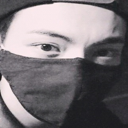

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.29803922, 0.29019608, 0.29803922],
        [0.32156863, 0.31372549, 0.32941176],
        [0.29411765, 0.29019608, 0.30980392],
        ...,
        [0.17647059, 0.16078431, 0.17647059],
        [0.15686275, 0.15686275, 0.17647059],
        [0.15686275, 0.17254902, 0.18039216]],

       [[0.30196078, 0.29411765, 0.30588235],
        [0.3254902 , 0.32156863, 0.33333333],
        [0.30588235, 0.30588235, 0.31372549],
        ...,
        [0.18823529, 0.17647059, 0.19215686],
        [0.16862745, 0.16078431, 0.18039216],
        [0.16862745, 0.16862745, 0.18039216]],

       [[0.29803922, 0.29411765, 0.30588235],
        [0.32941176, 0.32941176, 0.3372549 ],
        [0.28627451, 0.29019608, 0.29411765],
        ...,
        [0.18823529, 0.18039216, 0.19607843],
        [0.18039216, 0.17647059, 0.19607843],
        [0.18039216, 0.18039216, 0.19215686]],

       ...,

       [[0.73333333, 0.70980392, 0.71764706],
        [0.71372549, 0.69019608, 0.69803922],
        [0.6745098 , 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - acc: 0.7010 - loss: 0.6235 - val_acc: 0.8711 - val_loss: 0.3044
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8689 - loss: 0.3191 - val_acc: 0.8843 - val_loss: 0.2872
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8998 - loss: 0.2416 - val_acc: 0.8992 - val_loss: 0.2602
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9182 - loss: 0.2149 - val_acc: 0.9041 - val_loss: 0.2219
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9310 - loss: 0.1732 - val_acc: 0.9107 - val_loss: 0.2390


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9156 - loss: 0.2293
Test Accuracy = 0.9159497022628784


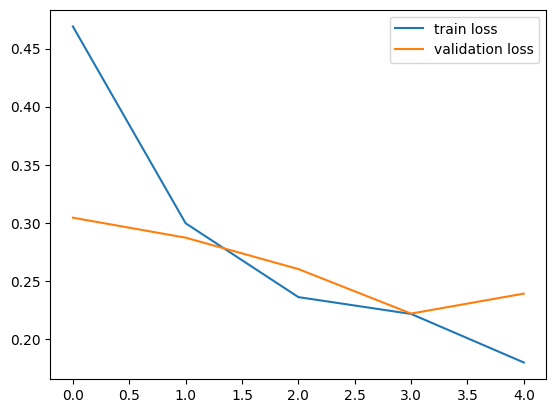

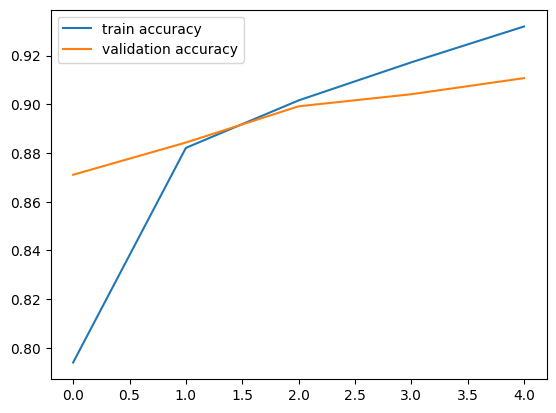

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: with_mask_1.jpg


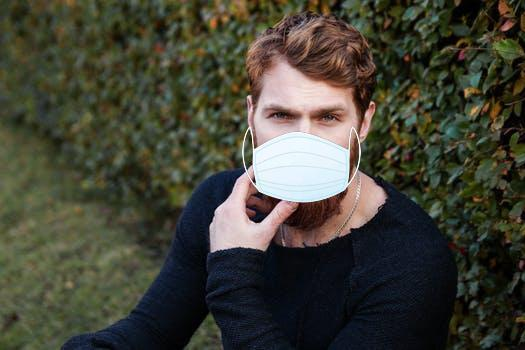

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
[[0.49897018 0.4850236 ]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: without_mask_1004.jpg


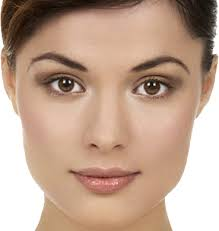

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.5217159 0.4644544]]
0
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')